In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [2]:
#Read in the CSV and read in the data
df = pd.read_csv("../Resources/neighborhood_tier_final.csv")

In [3]:
df.head()

,postal_code,State,City,CountyName,2021,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,...,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars,num_rest_categories,Average County House Price,Neighborhood Indicator,Neighborhood Tiers
0,37013,TN,Nashville,Davidson County,295552,83,3.096386,4257.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,60,439999.0,0.671711,3
1,37211,TN,Nashville,Davidson County,340382,182,3.491758,12761.0,2.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,92,439999.0,0.773597,2
2,37221,TN,Nashville,Davidson County,401000,69,3.217391,6690.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,57,439999.0,0.911366,2
3,37209,TN,Nashville,Davidson County,445902,147,3.772109,16663.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,93,439999.0,1.013416,2
4,37076,TN,Nashville,Davidson County,328591,81,3.228395,4994.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,53,439999.0,0.746799,3


In [4]:
#drop unneeded columns
df = df.drop(columns=['postal_code', 'State', 'City', 'CountyName', '2021', "Average County House Price", "Neighborhood Indicator"])

In [5]:
df.head()

,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,...,Pita_stars,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars,num_rest_categories,Neighborhood Tiers
0,83,3.096386,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,3
1,182,3.491758,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92,2
2,69,3.217391,6690.0,0.0,3.0,3.0,14.0,20.0,13.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,2
3,147,3.772109,16663.0,0.0,10.0,2.0,24.0,19.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93,2
4,81,3.228395,4994.0,0.0,4.0,3.0,12.0,23.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,3


In [6]:
df.shape

(750, 421)

# Create Scaled Training and Test data

In [7]:
# Create the features
X = df.drop(columns='Neighborhood Tiers')
X.head()

,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,...,Donburi_stars,Pita_stars,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars,num_rest_categories
0,83,3.096386,4257.0,0.0,4.0,1.0,14.0,22.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60
1,182,3.491758,12761.0,2.0,12.0,5.0,23.0,37.0,26.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,92
2,69,3.217391,6690.0,0.0,3.0,3.0,14.0,20.0,13.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
3,147,3.772109,16663.0,0.0,10.0,2.0,24.0,19.0,18.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93
4,81,3.228395,4994.0,0.0,4.0,3.0,12.0,23.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53


In [8]:
X.describe()

,total_restaurants,avg_stars,total_reviews,BubbleTea,Coffee&Tea,Bakeries,Burgers,FastFood,Sandwiches,IceCream&FrozenYogurt,...,Donburi_stars,Pita_stars,Austrian_stars,EasternEuropean_stars,Cucinacampana_stars,ConveyorBeltSushi_stars,Poutineries_stars,Coffeeshops_stars,SerboCroatian_stars,num_rest_categories
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.0,750.000000,750.000000
mean,43.796000,3.517619,4748.614667,0.261333,3.708000,1.670667,5.385333,6.912000,7.754667,1.018667,...,0.005333,0.004000,0.005333,0.005333,0.005333,0.005333,0.005333,0.0,0.005333,38.865333
std,44.799744,0.395660,10636.360840,0.761892,4.575294,2.234472,5.563523,7.940213,7.810579,1.312230,...,0.146059,0.109545,0.146059,0.146059,0.146059,0.146059,0.146059,0.0,0.146059,23.434236
min,1.000000,2.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.000000
25%,12.000000,3.285714,466.500000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.000000
50%,31.000000,3.503731,1680.000000,0.000000,2.000000,1.000000,4.000000,4.000000,6.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,37.000000
75%,64.000000,3.733325,5106.500000,0.000000,5.000000,2.000000,8.000000,10.750000,11.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,55.000000
max,361.000000,5.000000,176931.000000,10.000000,41.000000,19.000000,36.000000,44.000000,54.000000,8.000000,...,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.0,4.000000,130.000000


In [10]:
#Create target variable
y = df['Neighborhood Tiers']
y.head()

0    3
1    2
2    2
3    2
4    3
Name: Neighborhood Tiers, dtype: int64

In [12]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")


y_train: Counter({2: 281, 3: 142, 1: 139})
y_test: Counter({2: 86, 3: 55, 1: 47})


In [13]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
X_train_scaled[:, 2]

array([-4.31545280e-01, -3.83510157e-01, -5.25618684e-01, -4.60832283e-01,
       -1.98469546e-01,  2.20423349e-01, -5.20071903e-01,  1.06603405e-01,
       -1.74063710e-01, -2.84000908e-01, -1.90149374e-01, -3.73747823e-01,
       -4.94112969e-01,  4.50171015e-01, -4.45855975e-01, -4.54952695e-01,
        4.68091065e-02,  1.53900411e+00, -4.73146137e-01, -4.96331681e-01,
       -4.94112969e-01, -4.87013089e-01,  1.18917258e-01,  4.04465540e-01,
       -5.20345295e-02, -4.75475785e-01,  9.30189436e-01,  2.26192001e-01,
        4.19663720e-01,  1.32212498e+00, -5.09754891e-01, -3.69643205e-01,
       -4.58502635e-01, -2.34190815e-01, -3.83177350e-01, -3.79738346e-01,
       -3.92052200e-01,  8.95466587e-01, -5.22512487e-01, -2.76568221e-01,
        2.17317152e-01, -2.38295433e-01, -5.16743835e-01,  1.68505480e-01,
        1.05044365e+00,  3.12167106e-01, -4.31323409e-01, -5.24842135e-01,
        2.59916429e-01, -5.06981500e-01,  8.09197109e+00,  1.76936587e-01,
        9.11833539e-02, -

In [15]:
X_test_scaled[:,2]

array([ 4.49616337e-01, -3.96156818e-01, -4.58835442e-01, -8.80886054e-02,
        1.39329412e-01, -5.21735938e-01,  1.85478630e-01, -9.94040385e-02,
       -4.91450514e-01, -1.51210972e-01, -1.35790921e-01, -9.82946823e-02,
       -2.67027758e-01,  8.61520288e-01, -5.24731199e-01, -3.68533849e-01,
       -3.51116957e-01, -4.71593038e-01, -4.87013089e-01,  1.13592349e-01,
       -4.55285502e-01, -4.45079425e-01, -4.88898995e-01, -5.21846873e-01,
       -1.87043177e-01, -4.91502034e-02, -4.21006396e-01, -4.67155613e-01,
       -2.65030917e-01, -4.56838601e-01, -4.95333261e-01, -4.04809796e-01,
       -5.23399972e-01, -5.01101913e-01, -5.13526702e-01,  1.84369273e-01,
       -3.24825215e-01,  4.48174174e-01, -2.85221199e-01, -2.26869064e-01,
       -1.13049120e-01,  1.39855962e+00, -4.50293399e-01, -5.22845294e-01,
       -2.75902607e-01, -5.00880041e-01, -2.88105525e-01, -3.13731653e-01,
        2.56921168e-01, -4.67599356e-01, -2.94206984e-01, -4.56062052e-01,
        1.24879653e+00, -

# Create a logistic regression model

In [16]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [17]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [18]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
618,1,1
53,1,1
289,2,3
221,2,2
232,3,2
726,2,2
472,2,2
351,2,2
344,2,1
388,1,2


In [27]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
acc_LR = balanced_accuracy_score(y_test, y_pred_LR)
acc_LR

0.4077474397612943

In [20]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.7287234042553191

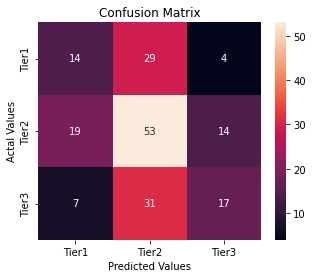

In [21]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [22]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.35      0.30      0.32        47
           2       0.47      0.62      0.53        86
           3       0.49      0.31      0.38        55

    accuracy                           0.45       188
   macro avg       0.43      0.41      0.41       188
weighted avg       0.44      0.45      0.43       188



# Create Balanced Random Forest Classifier

In [23]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=10000, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=10000, random_state=1)

In [26]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_RF)


0.5417045267119488

In [25]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.7446808510638298

In [29]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head(20)

,Prediction,Actual
618,1,1
53,1,1
289,1,3
221,2,2
232,3,2
726,1,2
472,2,2
351,2,2
344,2,1
388,3,2


In [30]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([1.46706388e-02, 2.49584127e-02, 2.28728862e-02, 1.15309026e-03,
       8.61968037e-03, 5.07049990e-03, 1.13169825e-02, 1.21160853e-02,
       9.87102745e-03, 4.61539889e-03, 2.06586824e-03, 4.51783366e-03,
       1.01638032e-02, 5.99412468e-03, 8.10527839e-03, 6.31891578e-03,
       5.01475835e-03, 1.92424395e-03, 4.14739283e-03, 4.56460542e-03,
       1.08967941e-02, 1.04249697e-02, 1.23071393e-02, 1.22390869e-03,
       2.07851800e-03, 4.80032836e-03, 1.07786406e-02, 9.38939916e-03,
       7.57309358e-03, 2.68071130e-03, 2.03244803e-03, 2.54579401e-03,
       6.12388856e-03, 5.80445330e-03, 5.51749664e-03, 2.47711881e-03,
       3.00026842e-03, 9.18438464e-03, 3.23105337e-03, 1.00287752e-02,
       3.78903684e-03, 2.95512246e-04, 3.90467959e-03, 7.74020570e-03,
       4.32546551e-04, 3.34855763e-03, 3.35395649e-03, 5.59916203e-03,
       3.57062637e-03, 3.34612948e-03, 3.99039322e-03, 1.49108013e-03,
       2.89210926e-03, 4.87146927e-03, 1.48186359e-03, 1.24949218e-03,
      

In [31]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)


[(0.024958412702052752, 'avg_stars'),
 (0.022872886218599835, 'total_reviews'),
 (0.019618062993795454, 'Pizza_stars'),
 (0.016816952005028283, 'num_rest_categories'),
 (0.01520637937086224, 'FastFood_stars'),
 (0.014670638756054408, 'total_restaurants'),
 (0.014133746697183806, 'Italian_stars'),
 (0.01410572135747234, 'Sandwiches_stars'),
 (0.013711693958739998, 'American(Traditional)_stars'),
 (0.01360461028982364, 'Burgers_stars'),
 (0.012403497966676674, 'American(New)_stars'),
 (0.012307139294834946, 'ChickenWings'),
 (0.012238606251671494, 'Coffee&Tea_stars'),
 (0.012174876661956633, 'Breakfast&Brunch_stars'),
 (0.012116085296251102, 'FastFood'),
 (0.01146952982671724, 'Seafood_stars'),
 (0.01136919302837982, 'Bars_stars'),
 (0.011316982495276188, 'Burgers'),
 (0.01089679414552041, 'Italian'),
 (0.01077864057589446, 'American(New)'),
 (0.01042496967079377, 'Pizza'),
 (0.010322777341506712, 'Mexican_stars'),
 (0.010163803180471732, 'American(Traditional)'),
 (0.010028775232086692,

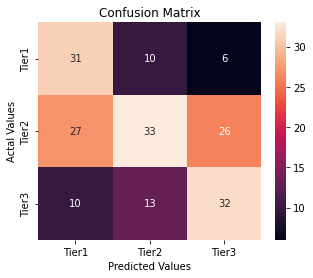

In [32]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [33]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.46      0.66      0.54        47
           2       0.59      0.38      0.46        86
           3       0.50      0.58      0.54        55

    accuracy                           0.51       188
   macro avg       0.52      0.54      0.51       188
weighted avg       0.53      0.51      0.50       188



# Create Easy Ensemble AdaBoost Classifier

In [34]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=100, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [35]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_Ada)

0.57312911399997

In [36]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
618,1,1
53,2,1
289,1,3
221,2,2
232,3,2
726,2,2
472,3,2
351,2,2
344,2,1
388,2,2


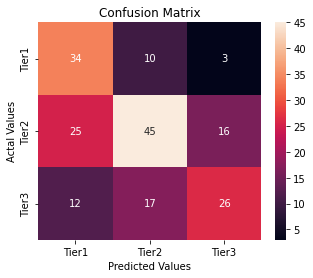

In [37]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [38]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.48      0.72      0.58        47
           2       0.62      0.52      0.57        86
           3       0.58      0.47      0.52        55

    accuracy                           0.56       188
   macro avg       0.56      0.57      0.56       188
weighted avg       0.57      0.56      0.56       188



# Create Gradient Boosting Classifier

In [39]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.532
Accuracy score (validation): 0.463

Learning rate:  0.1
Accuracy score (training): 0.585
Accuracy score (validation): 0.479

Learning rate:  0.25
Accuracy score (training): 0.742
Accuracy score (validation): 0.505

Learning rate:  0.5
Accuracy score (training): 0.797
Accuracy score (validation): 0.537

Learning rate:  0.75
Accuracy score (training): 0.849
Accuracy score (validation): 0.484

Learning rate:  1
Accuracy score (training): 0.891
Accuracy score (validation): 0.441



In [40]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=10,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
618,2,1
53,2,1
289,2,3
221,2,2
232,3,2
726,2,2
472,2,2
351,2,2
344,2,1
388,3,2


In [41]:
balanced_accuracy_score(y_test, y_pred_GBC)

0.3880857061460723

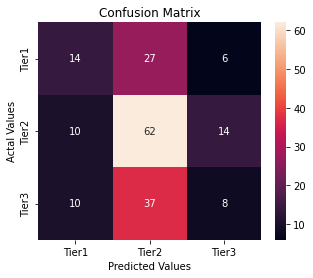

In [42]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [43]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.41      0.30      0.35        47
           2       0.49      0.72      0.58        86
           3       0.29      0.15      0.19        55

    accuracy                           0.45       188
   macro avg       0.40      0.39      0.37       188
weighted avg       0.41      0.45      0.41       188



# Naive Bayes model

In [44]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [45]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [46]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
618,1,1
53,3,1
289,3,3
221,3,2
232,3,2
726,3,2
472,3,2
351,2,2
344,3,1
388,1,2


In [47]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.35638297872340424


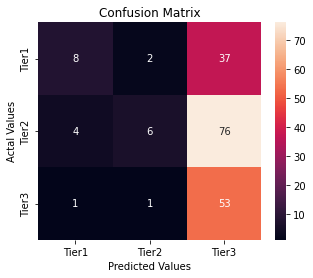

In [48]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2','Tier3'], 
                     columns = ['Tier1','Tier2','Tier3'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [49]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.62      0.17      0.27        47
           2       0.67      0.07      0.13        86
           3       0.32      0.96      0.48        55

    accuracy                           0.36       188
   macro avg       0.53      0.40      0.29       188
weighted avg       0.55      0.36      0.26       188

